import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# Sales Analysis with Pandas

<b>Pandas Introduction:</b>

Pandas is an open-source library built in python which has capabilities to deal with large data files and perform mathematical and scientific computations to a greater extent. It is widely used by data scientist in all fields and has gained significant importance over the years.

For this notebook, the goal is to analyse sales data of an unknown store for a period of 12 months using Pandas. There are 12 files in the data directory. The files will be mergered to form a dataframe and it is used to answer few or more business questions. New columns will be added to the dataframe to make analysis simpler. 

This notebook requires Python version of 3 and above. Please make sure Python is installed in your local computer. Additional dependencies include
1. Pandas library installed
2. NumPy library installed

Since this is a jupyter notebook. It is assumed you have an interface which opens jupyter notebooks. For more information on how to use jupyter using Anaconda, please refer this <a href="https://docs.anaconda.com/anaconda/install/">link</a>

#### Importing necessary libraries

In [215]:
# Importing pandas, numpy, glob and os
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

The data for this is taken from the following repository and cloning this reposity into local for analysis.

<b>Note: The below cell needs to be run only once. Running it multiple time would create multiple copies of the repo.

In [17]:
# Cloning the repository locally
!git clone 'https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git'

fatal: destination path 'Pandas-Data-Science-Tasks' already exists and is not an empty directory.


The data for the analysis is inside the Sales_Data folder. It has 12 months of data starting January 2019 till December 2019. Navigating using the 'ls' command would should us the files in the particular directory.

In [174]:
ls Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data

Sales_April_2019.csv      Sales_January_2019.csv    Sales_May_2019.csv
Sales_August_2019.csv     Sales_July_2019.csv       Sales_November_2019.csv
Sales_December_2019.csv   Sales_June_2019.csv       Sales_October_2019.csv
Sales_February_2019.csv   Sales_March_2019.csv      Sales_September_2019.csv


#### Importing multiple csv files and merging to a single dataframe

There are two ways to create a dataframe from multiple csv files with all the data.

#### Method 1

1. We use the library glob to create a list of all the file names. This method can be followed when files have similar names or atleast a part of the name which exists in all the files.
2. The method glob() from the glob library takes in the argument a string with uncommon part of the file name replaced with *. * is a wild card character which means that particular part of the string is unknown or check for file names that match only the part before it.


In [175]:
# Generating file names
file_names_1 = glob('Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_*.csv')
file_names_1

['Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_December_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_November_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_October_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_January_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_September_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_July_2019.csv',
 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/Sales_June_2019.csv']

#### Method 2

- We use Python's os library to print the file names present in the directory as a list. This is extremely useful when we just know the directory of files but not the file names.
- os.listdir() method takes in the argument of the folder path which has all the data files as a string.

In [176]:
# file names using os.listdir()
file_names_2 = os.listdir('Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/')
file_names_2

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

The difference between the two types of getting file names is apparant. The first method lists the entire name while the second method gives us only the file names.

Now, we will create a list of pandas dataframes from file names and concatenate to a single dataframe.

#### Using file names from method 1:

It is important to understand that pandas takes in the entire file path to create a dataframe from the file. So from the first method we just need to take the file name as it is.

In [177]:
# Using list comprehension to create a single dataframe
list_data_frames = [pd.read_csv(file, skip_blank_lines=True) for file in file_names_1]

all_data_1 = pd.concat(list_data_frames, ignore_index=True)

display(all_data_1.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Using file names from method 2:

As you can see in the second method we just have file names without the complete directory of file. So we will concatenate the file name with the folder directory to create a complete path to pandas and we create a dataframe as a result.

*Steps done in method 2:*
1. Created an empty dataframe to start with.
2. Created a for loop and in each loop, a path name with the common directory and file name from method 2 is created.
3. Loaded each csv with the path name
4. Finally, concatenated the generated dataframe to the existing dataframe.

In [178]:
# Creating an empty dataframe to 
all_data_2 = pd.DataFrame()

for file in file_names_2:
    path = 'Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/' + file
    df = pd.read_csv(path, skip_blank_lines=True)
    all_data_2 = pd.concat([all_data_2, df], ignore_index=True)
    
display(all_data_2.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


As it is clear that, both the methods resulted in the same dataframe with all the data of 12 months.
Now, we can go ahead to the next step.

#### Data cleaning:

 As an initial step in the data analysis process, it is very important to make sure that the data is suitable for analysis. If it is not, we can perform relevent data wrangling steps to obtain a tidy dataframe.
 Since both the methods yielded same output, we will use any one dataframe for our analysis.

#### Checking NaN's

What we do is check in all the columns if there are any NaNs and return the rows with columns that have NaNs

In [179]:
# checking NaN in all the columns
all_data_1[all_data_1.isna().any(axis='columns')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


From above, we understand that there are 545 rows with NaNs.
The approach that is intuitive here is, all the rows with NaN have all the cells filled with NaN. So it makes sense to just eliminate these rows as these don't give any information.

In [180]:
# Eliminating rows with NaNs
all_data_1 = all_data_1.dropna()

# Checking again
all_data_1[all_data_1.isna().any(axis='columns')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


So all the rows with NaNs are elimated.

In [181]:
all_data_1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


From above, we can see that there are 186305 rows but the index shows 186849 as the end point. We need to fix this. The solution is to reset index or set the index to order ID as the column itself is unique. Here, we would just do the reset index and drop the order ID column as there is no information gained from the column.

In [182]:
# pandas function reset_index() would do the job, setting drop=True is important as it would generate a new column
# old indexes which is not necessary and we drop the order ID column
all_data_indexed = all_data_1.reset_index(drop=True).drop('Order ID', axis=1)
display(all_data_indexed)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...
186300,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186301,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186302,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186303,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


Now the dataframe has proper indexing

While exploring to clean the dataframe a bit more, it is seen that the data has column names duplicated as rows. We need to fix this too as all rows should have identical characteristics.

In [183]:
# Example
all_data_indexed['Order Date'].value_counts()

Order Date        355
12/15/19 20:16      8
10/30/19 21:28      7
04/02/19 13:24      7
12/11/19 13:24      7
                 ... 
10/24/19 21:26      1
05/04/19 23:07      1
10/12/19 10:35      1
10/15/19 10:14      1
03/28/19 20:45      1
Name: Order Date, Length: 142396, dtype: int64

The Order Date column has cells with 'Order Date' text in it. For fixing this, let's start by converting the columns into the right data type and while doing so, this will be taken care.

In the below cell, what is done is
1. Convert the Order Date column to a datetime column and coerce the errors, infer the format from the column.
(The objective of this step to find the rows which have different datatype than and that helps in removing those rows.)
2. After finding those rows, we get the index of those and just drop them using drop()
3. Finally, we reset the index

In [184]:
indices_text = all_data_indexed[pd.to_datetime(all_data_indexed['Order Date'], 
                                               errors='coerce', 
                                               infer_datetime_format=True).isna()].index

all_data_indexed = all_data_indexed.drop(indices_text).reset_index(drop=True)
all_data_indexed

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...
185945,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
185946,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
185947,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
185948,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


So, now we have a tidier dataframe. Now, let's add few columns for easy data analysis. 

##### Converting all columns into appropriate datatypes

In [185]:
all_data_indexed['Order Date'] = pd.to_datetime(all_data_indexed['Order Date'], 
                                                errors='coerce', infer_datetime_format=True)

In [186]:
all_data_indexed['Product'] = all_data_indexed['Product'].astype('str')

In [187]:
all_data_indexed['Quantity Ordered'] = all_data_indexed['Quantity Ordered'].astype('int')

In [188]:
all_data_indexed['Price Each'] = all_data_indexed['Price Each'].astype('float')

In [189]:
all_data_indexed['Purchase Address'] = all_data_indexed['Purchase Address'].astype('str')

### Adding new columns

#### Adding Month column

It can be obtained from the Order Date column. Since the year is same for all dates, no need to add year column. Month column helps in finding sales per month

In [190]:
all_data_indexed['Month'] = all_data_indexed['Order Date'].dt.month

#### Adding City column

It's easy to define a function and apply that function to the address column to get city and state.

What we do is text split address via , and get second element for city and third element for state.

In [191]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [192]:
all_data_indexed['City'] = all_data_indexed['Purchase Address'].apply(lambda x: get_city(x))
all_data_indexed['State'] = all_data_indexed['Purchase Address'].apply(lambda x: get_state(x))

display(all_data_indexed[['City']])
display(all_data_indexed[['State']])

,City
0,New York City
1,New York City
2,New York City
3,San Francisco
4,Atlanta
...,...
185945,Boston
185946,New York City
185947,San Francisco
185948,San Francisco


,State
0,NY
1,NY
2,NY
3,CA
4,GA
...,...
185945,MA
185946,NY
185947,CA
185948,CA


In [234]:
all_data_indexed['Total Sales'] = all_data_indexed['Quantity Ordered']*all_data_indexed['Price Each']
all_data_indexed

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales
0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY,1700.00
1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY,600.00
2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY,11.95
3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,149.99
4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,11.95
...,...,...,...,...,...,...,...,...,...
185945,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston,MA,2.99
185946,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City,NY,149.99
185947,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,CA,11.95
185948,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco,CA,11.95


### Now, 'Data Analysis'

Let's do the analysis as per the questions.

#### Question 1: Which month had highest revenue and how much?

In [249]:
sales_by_month = all_data_indexed.groupby('Month').agg(np.sum)[['Total Sales']].sort_values('Total Sales', 
                                                                                            ascending = False)
sales_by_month

,Total Sales
Month,
12,4.613443e+06
10,3.736727e+06
4,3.390670e+06
11,3.199603e+06
5,3.152607e+06
3,2.807100e+06
7,2.647776e+06
6,2.577802e+06
8,2.244468e+06


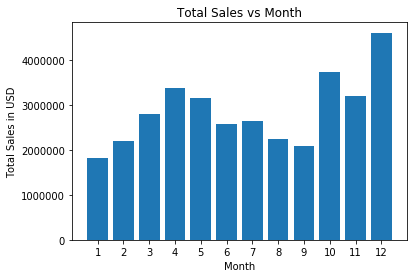

In [250]:
# plotting bar plot for revenue in each month

fig, ax = plt.subplots()

ax.bar(sales_by_month.index, sales_by_month['Total Sales'])
ax.set_xticks(sales_by_month.index)

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales in USD')
ax.set_title('Total Sales vs Month')

plt.show()

Since this kind of plots help in visualising more about sales, let's define a function that helps in plotting similar plots.

In [251]:
def bar_plot(x, y, xlabel, ylabel, title):
    """Function to plot with given x, y, xlabel, ylabel and title"""
    fig, ax = plt.subplots()
    
    ax.bar(x, y)
    ax.set_xticks(x)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xticks(rotation=90)
    plt.show()

So December being the month with highest revenue and January being the month with lower revenue.

#### Question 2: Which city(store) has the highest revenue?

In [252]:
sales_by_city = all_data_indexed.groupby(['City']).agg(np.sum)[['Total Sales']].sort_values('Total Sales', 
                                                                                            ascending=False)
sales_by_city

,Total Sales
City,
San Francisco,8.262204e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Boston,3.661642e+06
Atlanta,2.795499e+06
Dallas,2.767975e+06
Seattle,2.747755e+06
Portland,2.320491e+06
Austin,1.819582e+06


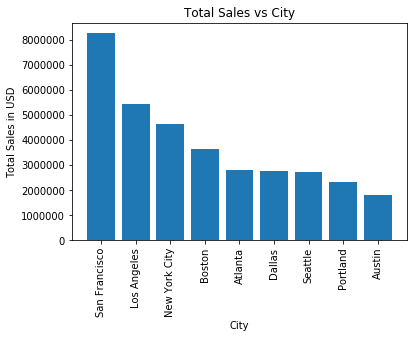

In [253]:
bar_plot(sales_by_city.index, sales_by_city['Total Sales'], 'City', 'Total Sales in USD', 'Total Sales vs City')


So, San Francisco has the highest revenue and Austin has the lowest revenue.

#### Question 3: What are the best selling products in each month? 

In [229]:
all_data_indexed.groupby(['Month','Product']).agg(np.sum)[['Quantity Ordered']]

Quantity Ordered
Month Product                                 
1     20in Monitor                         218
      27in 4K Gaming Monitor               313
      27in FHD Monitor                     422
      34in Ultrawide Monitor               314
      AA Batteries (4-pack)               1424
...                                        ...
12    ThinkPad Laptop                      539
      USB-C Charging Cable                3250
      Vareebadd Phone                      284
      Wired Headphones                    2749
      iPhone                               906

[228 rows x 1 columns]